# **Importing the data**

* **Age** : age of the patient <br>
* **Sex** :  gender of the patient [Male , Female]<br>
* **ChestPainType** : chest pain type<br>
 * ASY = Asymptomatic
 * NAP = Non Anginal pain
 * ATA = Atypical Angina
 * TA = Typical Angina
<br>
* **RestingBP** : Resting Blood Pressure (Hypertension) [mm Hg]<br>
* **Cholesterol** : Cholesterol level in the blood [mm/dl]<br>
* **FastingBS** : fasting blood sugar is the result of a blood sample taken after a patient fasts for at least eight hours
 * 1 = if FastingBS > 120 mg/dl
 * 0 = otherwise
 <br>
* **RestingECG** : resting electrocardiogram results<br>
* **MaxHR** :  Maximum Heart Rate achieved<br>
* **ExerciseAngina** : If person do angina exercise or not [Y = Yes, N = No]<br>
* **Oldpeak** : ST [Numeric value measured in depression]<br>
* **ST_Slope** : the slope of the peak exercise ST segment
 * Up = upsloping
 * Flat = flat
 * Down = downsloping
 <br>
* **HeartDisease** :  output class [1: heart disease, 0: Normal]<br>

## Read the data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### This data contains 11 features for predicting if a patient has heart disease or not (binary classification). 

In [10]:
df.shape

(918, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Here the column **FastingBS** has datatype of int and we need to adjust the type according to the data description

In [12]:
# To change the datatype
df['FastingBS'] = df['FastingBS'].astype(object) 
df['Oldpeak'] = df['Oldpeak'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    object
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   Oldpeak         918 non-null    int32 
 10  ST_Slope        918 non-null    object
 11  HeartDisease    918 non-null    int64 
dtypes: int32(1), int64(5), object(6)
memory usage: 82.6+ KB


In [14]:
# Describing the numerical variables in a tabular format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.720044,0.990165,-2.0,0.00,0.0,1.0,6.0
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### This helps to get a quick picture of the feature distribution. If the std is 0, we can confirm that all the values in that feature are same.

In [15]:
# Describing the categorical variables in a tabular format
df.describe(include='O').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


#### For futher analysis I created 2 list to seperate the numerical and the categorical columns

In [16]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

categorical_features.remove('HeartDisease')

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


---

# **Handling categorical features**

#### Convert categorical data into numerical representation

In [17]:
#description of data object columns
df.select_dtypes(include=['object']).describe()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918,918
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,725,496,704,552,547,460


#### I used LabelEncoder to convert each category into an integer value. 

In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in each categorical column
for col in categorical_features:
    df[col]= label_encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0,2,0
1,49,0,2,160,180,0,1,156,0,1,1,1
2,37,1,1,130,283,0,2,98,0,0,2,0
3,48,0,0,138,214,0,1,108,1,1,1,1
4,54,1,2,150,195,0,1,122,0,0,2,0


-----

# **Exploratory data analysis**

#### In this section, the dataset was analyzed to summarize the main characteristics and identify some obvious errors using data visualization methods. 

## Univariate Visualization

Univariate visualization is performed to understand each data variable

### Target (Heart Diseases Status)

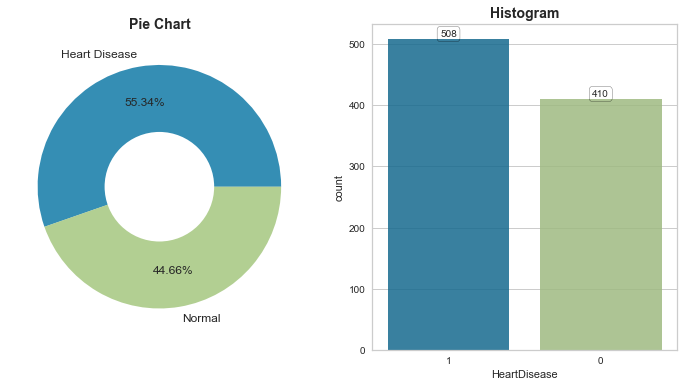

In [271]:
plt.figure(figsize=(12,6))

# Pie Chart 
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease', 'Normal'], 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='HeartDisease', data=df, order=df['HeartDisease'].value_counts().index, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

#### We can see the two classes are balanced, 55% of the data are having heart disease (class 1) and 44% are normal (class 0).

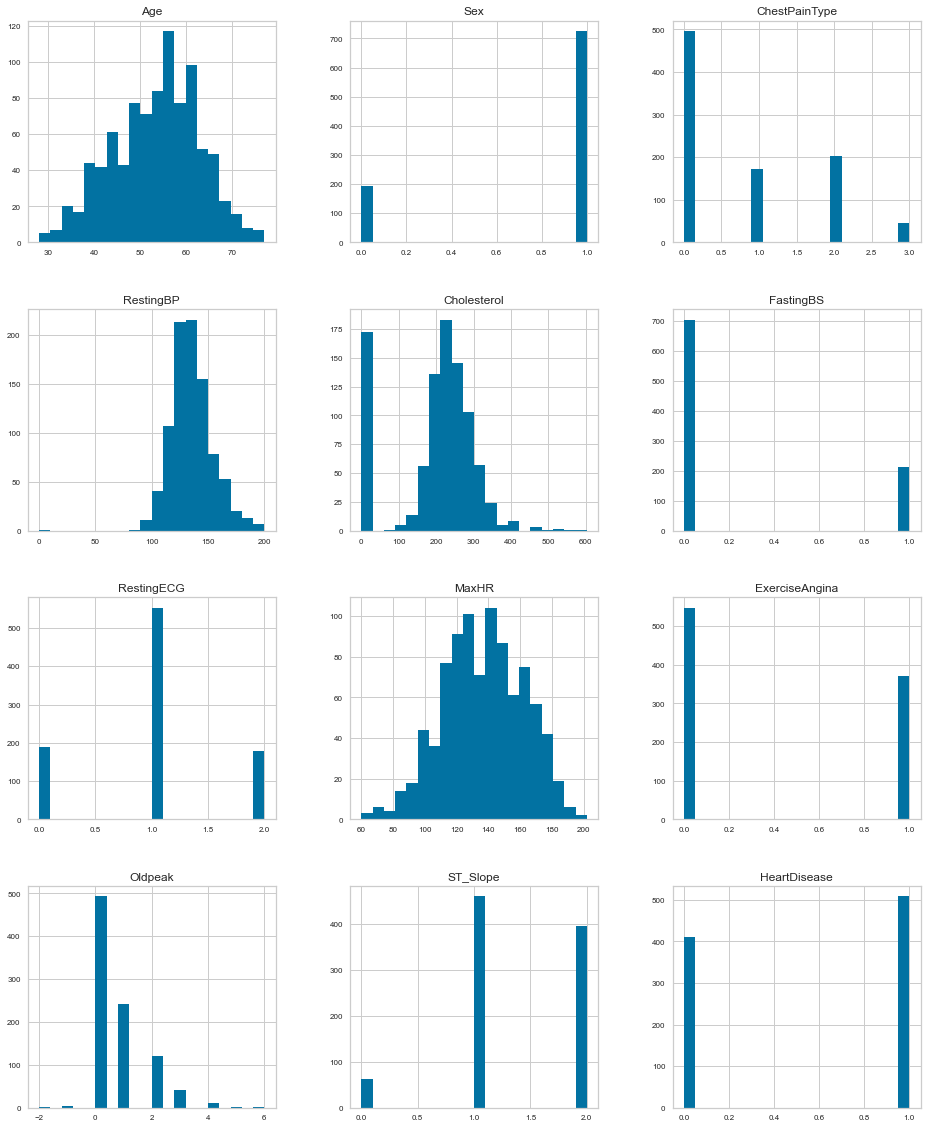

In [268]:
# plot histogram for all columns
_ = df.hist(figsize=(16,20),bins =20, xlabelsize=8, ylabelsize = 8)

-	Age and MaxHR have a normal distribution and seem to not have outliers.
-	Most of the patient instances are Male. 
-	RestingBP has a skewed distribution need to normalize.
-	Cholesterol has many zero values.
-	Oldpeak is not normally distributed.

#### For the numerical attributes, I use a boxplot to see how the data values are spread out and check if there is an outlier or not. 

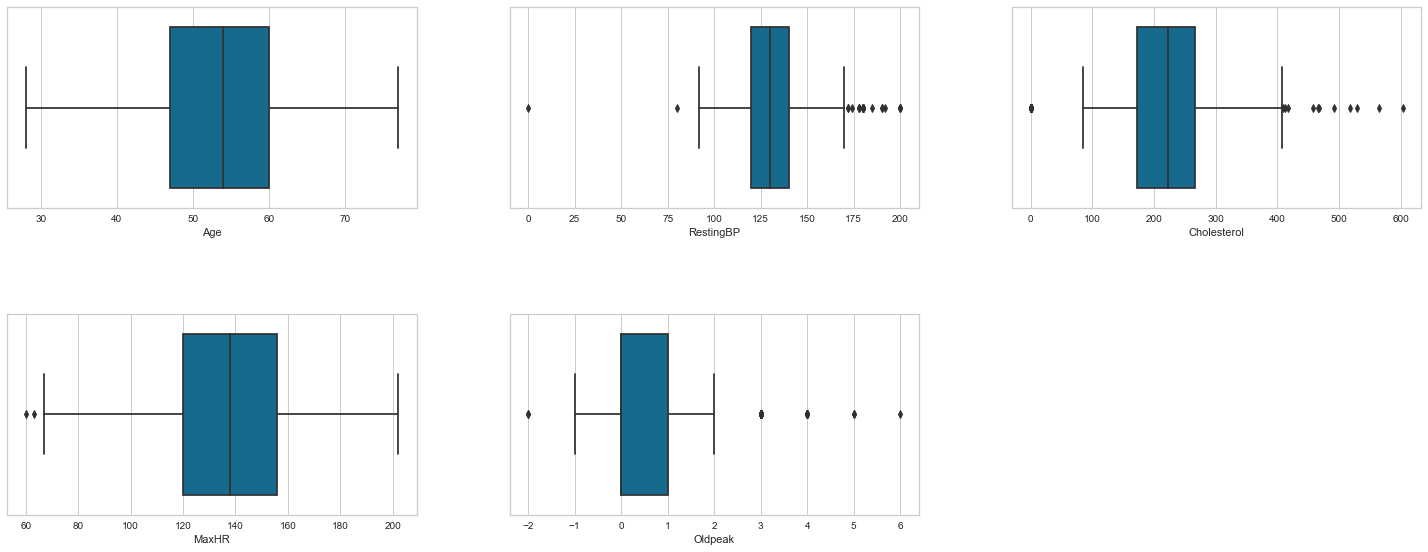

In [269]:
# Check if there any outliers by visualization
col_list = numerical_features
col_list=list(col_list)
cols = 3
rows = 12

# Plot Box for each column
fig= plt.figure(figsize=(20,50))
for i, col_name in enumerate(col_list):
    if i==40:
        break
    fig.add_subplot(rows, cols, i+1)
    fig.tight_layout(h_pad=6, w_pad=6)
    sns.boxplot(x=df[col_name])
plt.show()


- Age don't have any outliers
- RestingBP might have few outliers as the distribution is skewed and ranging from 70-200 but also has zero values
- Cholesterol has zeros and has outliers 
- MaxHR have very less outliters which might not be affecting our model performance 

## Multivariate Visualization

#### Multivariate visualization was applied to the dataset to see the relationship between two or multiple attributes. 

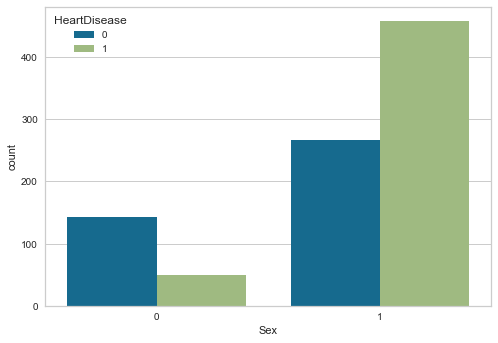

Sex(1): 0.63% have a Heart disease
Sex(0): 0.26% have a Heart disease


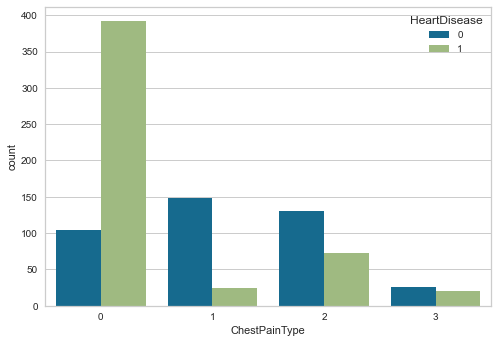

ChestPainType(1): 0.14% have a Heart disease
ChestPainType(2): 0.35% have a Heart disease
ChestPainType(0): 0.79% have a Heart disease
ChestPainType(3): 0.43% have a Heart disease


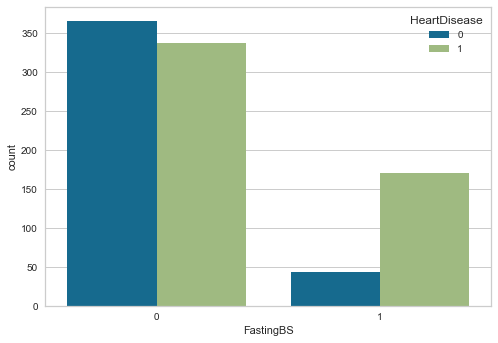

FastingBS(0): 0.48% have a Heart disease
FastingBS(1): 0.79% have a Heart disease


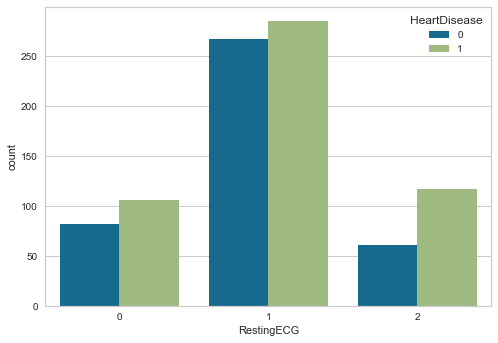

RestingECG(1): 0.52% have a Heart disease
RestingECG(2): 0.66% have a Heart disease
RestingECG(0): 0.56% have a Heart disease


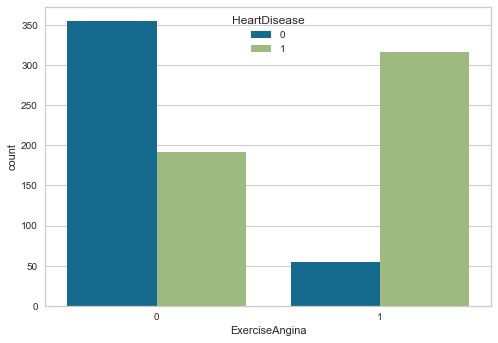

ExerciseAngina(0): 0.35% have a Heart disease
ExerciseAngina(1): 0.85% have a Heart disease


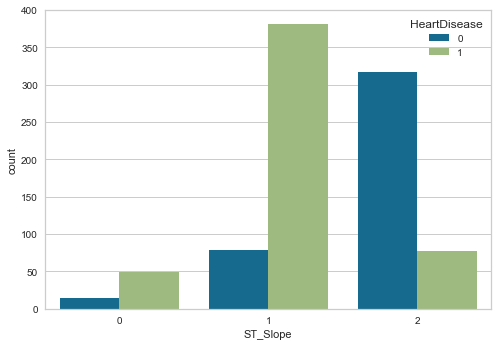

ST_Slope(2): 0.20% have a Heart disease
ST_Slope(1): 0.83% have a Heart disease
ST_Slope(0): 0.78% have a Heart disease


In [270]:
# Plot for the categorical features to see the total observations among each value in the Heart disease column
for col in categorical_features:
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.show()
    for i in df[col].unique():
        print(f"{col}({i}): {len(df[(df[col] == i) & (df['HeartDisease'] == 1)]) / len(df[df[col] == i]):.2f}% have a Heart disease")


-	63% of men are having heart disease.
-	Heart disease is present in 79% of patients with asymptomatic chest pain type (0).
-	Approximately 85% of patients diagnosed with heart disease when exercising angina were Yes (1).
-	A flat ST Slope (1) leads to 83% more heart disease cases.
-	Fasting blood sugars below 121 mg/dl (0) are associated with 48% of heart disease diagnoses.
-	Fasting blood sugar over 120 mg/dl (1), 79% were diagnosed with heart disease.

## Numerical Variables

#### See the distribution for each numerical feature among each value in the Heart disease

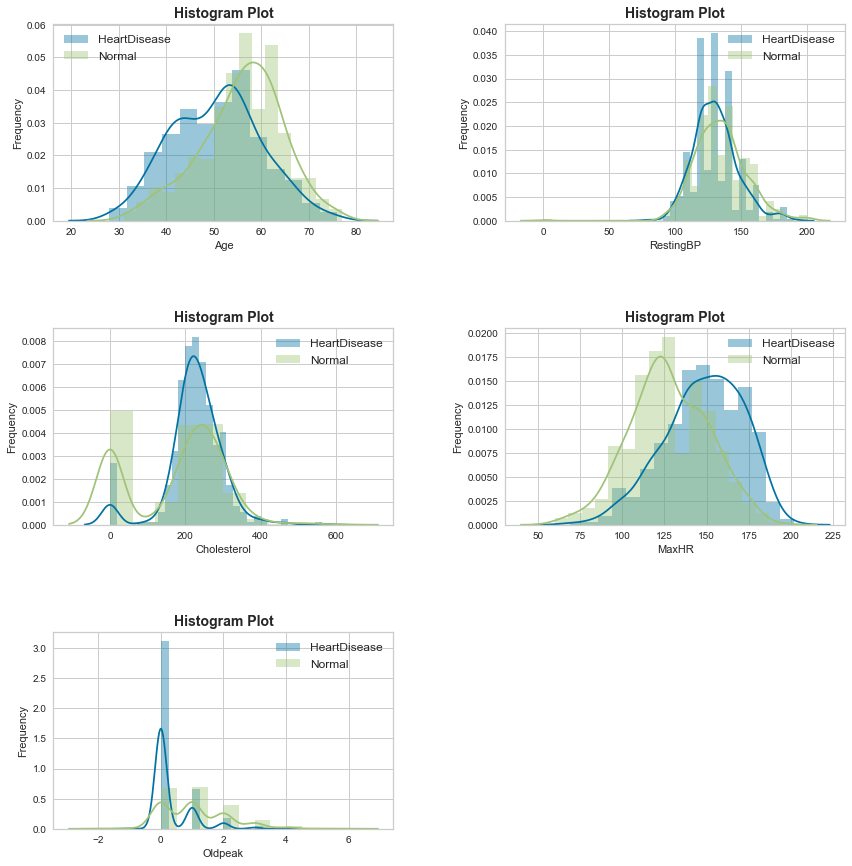

In [272]:
fig=plt.figure(figsize=(12, 12))

cols = 2
rows = 3

for i, col_name in enumerate(numerical_features):
    if i==40:
        break
    fig.add_subplot(rows, cols, i+1)
    fig.tight_layout(h_pad=5, w_pad=5)
    
    df1 = df[df.HeartDisease == 0]
    sns.distplot(df1[col_name],  hist= True, kde=True, label='HeartDisease')
    
    df1 =df[df.HeartDisease == 1]
    sns.distplot(df1[col_name],  hist= True, kde=True, label='Normal')
    
    plt.legend(prop={'size': 12})
    plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
plt.show()

#### To show correlation levels/values between each variable

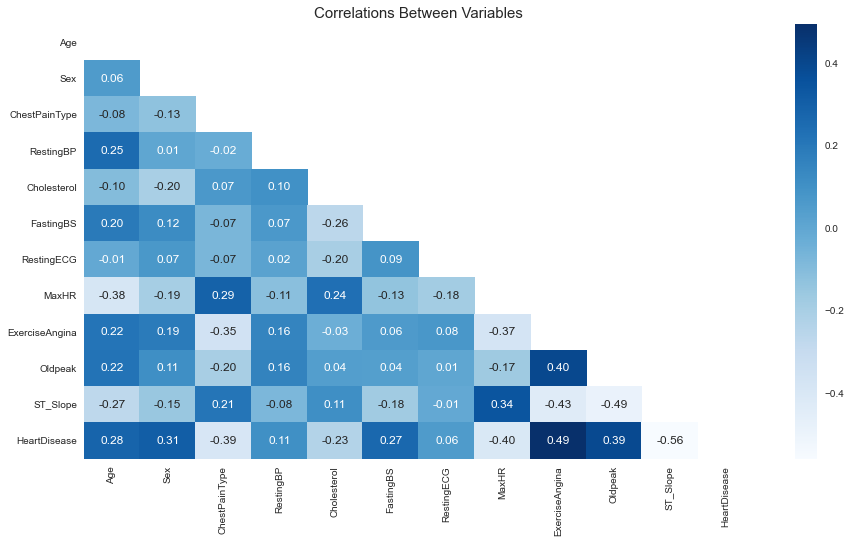

In [273]:
corr=df.corr()
# Getting the Upper Triangle of the co-relation matrix
mask=np.triu(corr)

plt.figure(figsize= (15,8))
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues", mask=mask)
plt.title("Correlations Between Variables",size = 15)
plt.show()

- The correlation can be used to measure the strength of a relationship between two variables.
- The upper triangular of the correlation map was dropped due to its repeated values. 
- If we set the threshold to be [0.2, -0.2] then **RestingBP** and **RestingECG** have lower correlation values [0.11, 0.06] with our target (HeartDisease) and can be dropped without affecting our prediction. 

-----

# **Handling missing values**

In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
# Duplicate values analysis
df.duplicated().sum()

0

As we can see there are no null values or duplicated values in our dataset

---

# **Handling outliers**

### Detect outliers

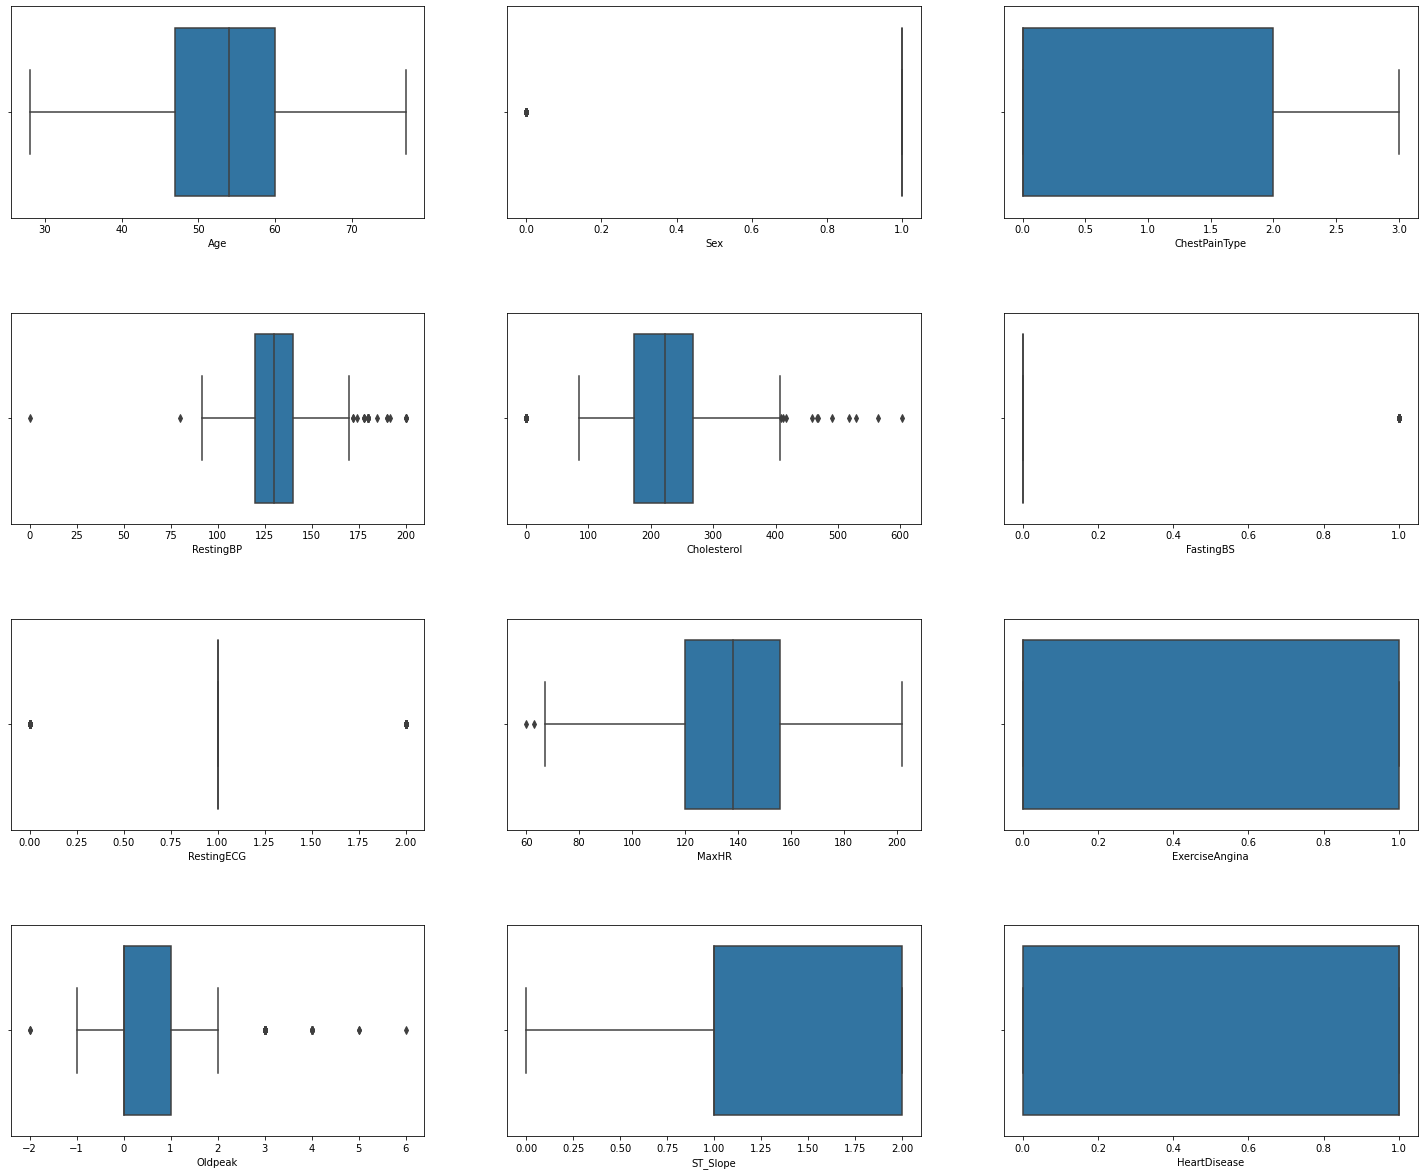

In [21]:
# Check if there any outliers by visualization
col_list = df.columns
col_list=list(col_list)
cols = 3
rows = 12

# Plot the box plot again
fig= plt.figure(figsize=(20,50))
for i, col_name in enumerate(col_list):
    if i==40:
        break
    fig.add_subplot(rows, cols, i+1)
    fig.tight_layout(h_pad=6, w_pad=6)
    sns.boxplot(x=df[col_name])
plt.show()


We can detect the outliers using the Inter Quantile Range by following these steps:
-	Calculate the interquartile range for the data.
-	Calculate the upper bound by adding 1.5 * (IQR) to the third quartile.
-	Calculate the lower bound by subtracting 1.5 * (IQR) from the first quartile.
-	Any number greater than the upper bound or less than the lower bound is a suspected outlier.

In [22]:
# identify outliers with interquartile range
from numpy import percentile

for col_name in numerical_features:
    
    # calculate interquartile range
    q25, q75 = percentile(df[col_name], 25), percentile(df[col_name], 75)
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers = df[col_name][((df[col_name]<lower) | (df[col_name]>upper))]
    
    print(col_name)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    print('number of outliers:'+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))
    #print(outliers)
    print('lower bound: '+ str(lower))
    print('upper bound: '+ str(upper))
    print('-----------')

Age
Percentiles: 25th=47.000, 75th=60.000, IQR=13.000
number of outliers:0
max outlier value: nan
min outlier value: nan
lower bound: 27.5
upper bound: 79.5
-----------
RestingBP
Percentiles: 25th=120.000, 75th=140.000, IQR=20.000
number of outliers:28
max outlier value: 200
min outlier value: 0
lower bound: 90.0
upper bound: 170.0
-----------
Cholesterol
Percentiles: 25th=173.250, 75th=267.000, IQR=93.750
number of outliers:183
max outlier value: 603
min outlier value: 0
lower bound: 32.625
upper bound: 407.625
-----------
MaxHR
Percentiles: 25th=120.000, 75th=156.000, IQR=36.000
number of outliers:2
max outlier value: 63
min outlier value: 60
lower bound: 66.0
upper bound: 210.0
-----------
Oldpeak
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
number of outliers:58
max outlier value: 6
min outlier value: -2
lower bound: -1.5
upper bound: 2.5
-----------


- RestingBP distribution was skewed due to the zero values and larger outlier values. 
- Cholesterol has the maximum number of outliers and most of it was zeros. 

### Handle outliers

#### For all these outliers, replace the value of the outlier with the close upper or lower bound value. 

In [23]:
# Outlier removal
for col_name in numerical_features:
    q25, q75 = percentile(df[col_name], 25), percentile(df[col_name], 75)
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df.loc[df[col_name] > upper, col_name] = upper
    df.loc[df[col_name] < lower, col_name] = lower   

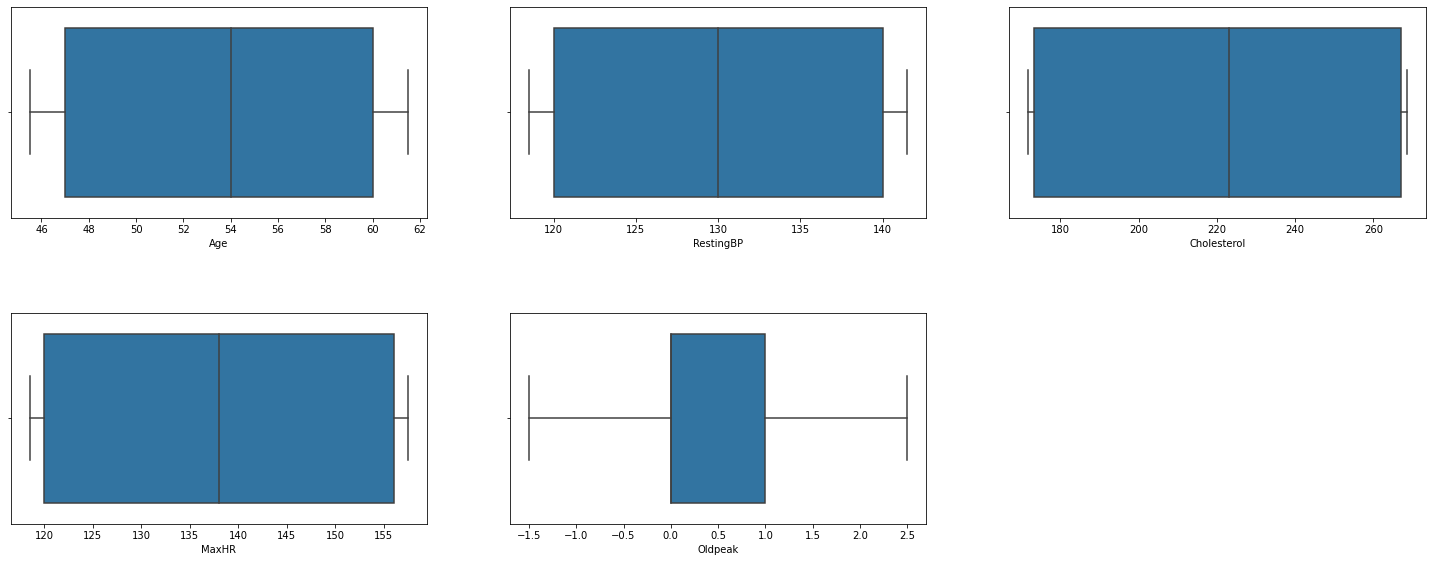

In [24]:
# Check if there any outliers by visualization
fig= plt.figure(figsize=(20,50))
for i, col_name in enumerate(numerical_features):
    if i==40:
        break
    fig.add_subplot(rows, cols, i+1)
    fig.tight_layout(h_pad=6, w_pad=6)
    sns.boxplot(x=df[col_name])
plt.show()

#### our dataset will return with no outlier values in the numerical attributes

---

# **Feature selection**

#### To select the most relevant features that contribute to the target (Heart Disease)
#### we can simply calculate the correlation between each attribute and then the target sorts the values 

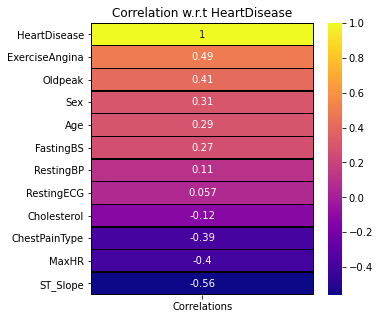

In [25]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Everyone displays a positive or negative relationship with HeartDisease except for RestingBP and RestingECG

### Chi Squared Test for Categorical Features

Chi-Square is to be used when:
- the feature is categorical
- the target variable is any way can be thought as categorical

It measures the degree of association between two categorical variables

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

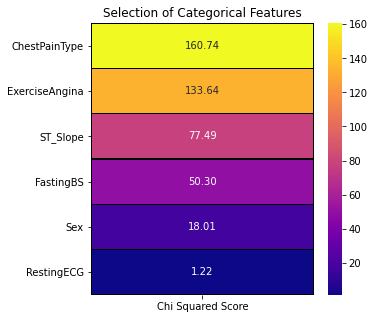

In [27]:
features = df.loc[:,categorical_features]
target = df['HeartDisease']

# Score function:  Chi2 tells the feature to be selected using Chi Square
# k = all tells all features will be selected and ordered
best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['Chi Squared Score']) 

# plot as heat map
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### ANOVA Test for Numerical Features

ANOVA is used for testing two variables, where:
- one is a categorical variable
- another is a numerical variable

It can lets you know if your numerical variable changes according to the level of the categorical variable

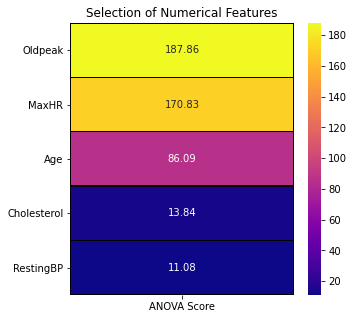

In [28]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df['HeartDisease']

# Score function:  f_classif is ANOVA F-value between label/feature for classification tasks
# k = all tells all features will be selected and ordered
best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['ANOVA Score']) 

# plot the heatmap
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

---

# **Feature scaling**

The machine learning model cannot understand the units of the value of the features. 
- Age ranges from 46 – 62 and Cholesterol ranges from 180 – 260, both features have a different scale. 
- Using this raw value of the feature might bias models toward features with larger values. 

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Using Min-Max scale
mm = MinMaxScaler()

for col in df.columns: 
    df[col] = mm.fit_transform(df[[col]])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.00000,1.0,0.333333,0.934783,1.000000,0.0,0.5,1.000000,0.0,0.375,1.0,0.0
1,0.21875,0.0,0.666667,1.000000,0.085271,0.0,0.5,0.961538,0.0,0.625,0.5,1.0
2,0.00000,1.0,0.333333,0.500000,1.000000,0.0,1.0,0.000000,0.0,0.375,1.0,0.0
3,0.15625,0.0,0.000000,0.847826,0.436693,0.0,0.5,0.000000,1.0,0.625,0.5,1.0
4,0.53125,1.0,0.666667,1.000000,0.240310,0.0,0.5,0.089744,0.0,0.375,1.0,0.0


#### Our data transformed such that each value is within the range [0-1] 

----

# **Feature Transformation**

#### Transforming features could stabilize variance, adhere closely to the normal distribution, and make data independent of the mean

In [30]:
from sklearn.preprocessing import PowerTransformer

In [31]:
#sepate labels and target
X = df[df.columns.drop(['HeartDisease'])]
#target
y = df['HeartDisease']

In [32]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [33]:
# Splitting the data into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

#### Applied Yeo-Johnson transformation to the dataset

In [34]:
# set up the variable transformer
transformer = PowerTransformer("yeo-johnson")

# fit the transformer
transformer.fit(X_train)

# transform the data
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

#### I tried to use the Box-cox transformation but it has a lower performance score than the Yeo-Johnson

In [322]:
# use box-cox transformation to transform the data

# pt = PowerTransformer(method='box-cox')
# pt.fit_transform(X+0.0000001)

# X

---

# **Build the machine learning models & train the model**

In [35]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(642, 11), y=(642,)
Test: X=(276, 11), y=(276,)


#### Out of 918 instances in our data, I used 642 instances for training and 276 for testing.

## Modelling

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import GridSearchCV

# The Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 

#### I defined a function that take the classifier and its prediction as parameters and return a full summary of its performance metrics, confusion matrix, and the ROC curve. 

In [37]:
def model(classifier, prediction):
    
    # Use 5-fold cross validation technique
    cv = RepeatedStratifiedKFold(n_splits = 5,n_repeats = 3,random_state = 1) 
    
    # Calculate the Confusion Matrix
    cm = confusion_matrix(y_test,prediction)
    names = ['True Neg','False Pos','False Neg','True Pos']    
    
    # Create table for evaluation measures
    # Accuracy
    acc= accuracy_score(y_test,prediction)
    # Precision
    pre= precision_score(y_test, prediction)
    # Recal
    recall= recall_score(y_test, prediction)
    # Specificity
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    # F1-score
    f1= f1_score(y_test, prediction)
    # Cross Validation Score
    crossval = cross_val_score(classifier, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
    # ROC Score
    rocval = roc_auc_score(y_test,prediction) 
    
    #DataFrame
    evaluation = pd.DataFrame({'Measure': ['Accuracy', 'Precision', 'Recall', 
                              'Specificity', 'F1-score', 'Cross Validation', 'ROC_AUC Score'], 
                              'Value': [acc*100, pre*100, recall*100, specificity*100, f1*100, crossval*100, rocval*100]}) 

    # Define figure size.
    plt.figure(figsize=(19, 7))
    
    # Confusion Matrix Plot
    plt.subplot(1, 2, 1)
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    plt.title('Confusion_Matrix_Plot')

    # ROC Graph Plot
    plt.subplot(1, 2, 2)
    visualizer = ROCAUC(classifier, classes = ['Heart Disease', 'Normal'], micro=False, macro=False, per_class=False)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    plt.show()

    return evaluation

## KNN

#### K-NN is a simple algorithm that is used to classify the new instance base on its k nearest neighbors. 

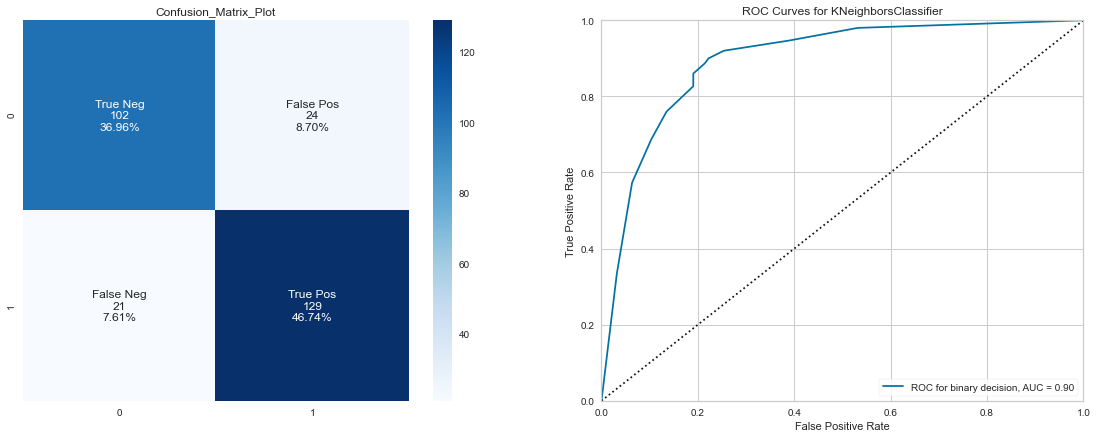

,Measure,Value
0,Accuracy,83.695652
1,Precision,84.313725
2,Recall,86.000000
3,Specificity,86.000000
4,F1-score,85.148515
5,Cross Validation,85.825662
6,ROC_AUC Score,83.476190


In [38]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
model(knn, knn_pred)

## Naïve Bayes

####  Naïve Bayes algorithm based on the Bayes Theorem that assumes strong independence between features.

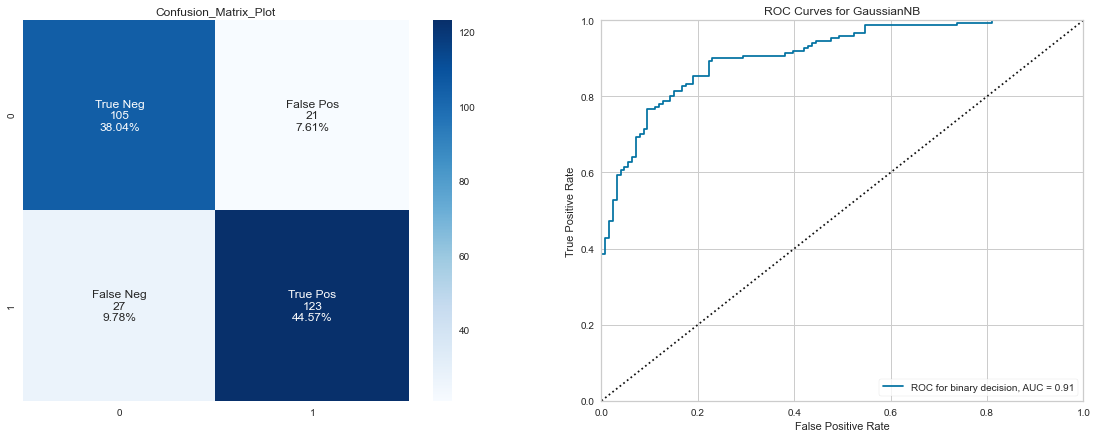

,Measure,Value
0,Accuracy,82.608696
1,Precision,85.416667
2,Recall,82.000000
3,Specificity,82.000000
4,F1-score,83.673469
5,Cross Validation,85.359738
6,ROC_AUC Score,82.666667


In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
model(nb, nb_pred)

## Logistic Regression

#### Logistic Regression is an extension of linear regression to solve classification problems

- **Penalty** : Regularization will penalize the extreme parameters

- **C** : high Hyper Parameter value C indicates that training data is more important and reflects the real world data, whereas low value is just the opposite.

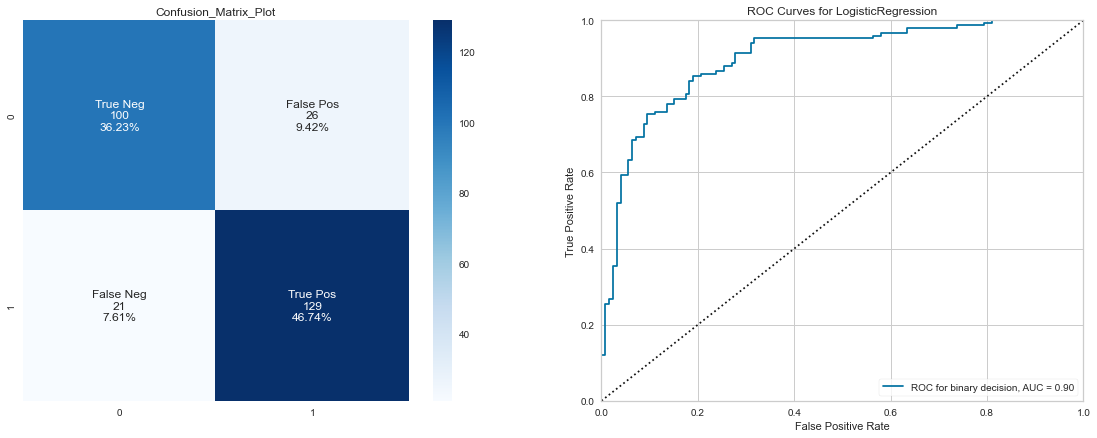

,Measure,Value
0,Accuracy,82.971014
1,Precision,83.225806
2,Recall,86.000000
3,Specificity,86.000000
4,F1-score,84.590164
5,Cross Validation,85.567264
6,ROC_AUC Score,82.682540


In [40]:
lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
model(lr,lr_pred)

## Decision Tree

#### The decision Tree algorithm is a tree-structured classifier that represents the dataset features by internal nodes, decision rules by branches, and outcomes by leaves. 

- **max_depth** : This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 
- **min_samples_leaf** : the minimum number of samples required to split the internal node

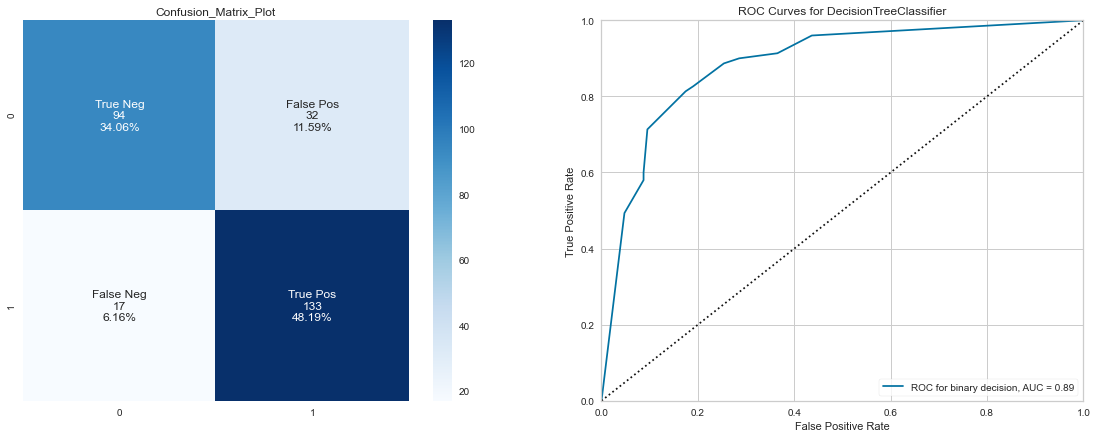

,Measure,Value
0,Accuracy,82.246377
1,Precision,80.606061
2,Recall,88.666667
3,Specificity,88.666667
4,F1-score,84.444444
5,Cross Validation,83.803295
6,ROC_AUC Score,81.634921


In [41]:
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
model(dt, dt_pred)

### Decision Tree with Hyperparameter Tunning

**Grid search** was performed on the decision tree classifier to obtain the best set of its hyperparameter that achieved the best performance on the given dataset. 

In [42]:
from scipy.stats import randint

# Creating the hyperparameter grid
param_dist = {"max_depth": [2, 3, 5, 10, 20],
              "min_samples_leaf": [5, 10, 20, 50, 100],
              "criterion": ["gini", "entropy"]}

# define grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_dist, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)

dt_ht_score = grid_result.best_score_

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.861386 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


## SVM

#### The SVM algorithm is used to determine the best line that will separate n-dimensional space into classes so that new data points can be easily placed in their correct class. 

- **kernel** : is used to transform the data into the required form of processing

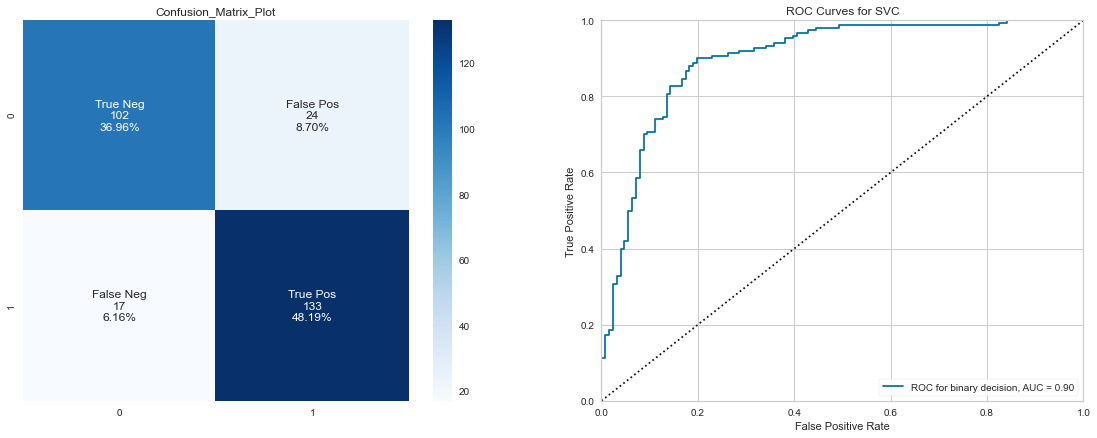

,Measure,Value
0,Accuracy,85.144928
1,Precision,84.713376
2,Recall,88.666667
3,Specificity,88.666667
4,F1-score,86.644951
5,Cross Validation,86.036014
6,ROC_AUC Score,84.809524


In [43]:
svc = SVC(kernel = 'rbf', C = 1.0) # Gaussian Kernel Radial Basis Function (RFB) 
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
model(svc, svc_pred)

## Random Forest

#### Random forests are used to train multiple decision trees and average the results. 

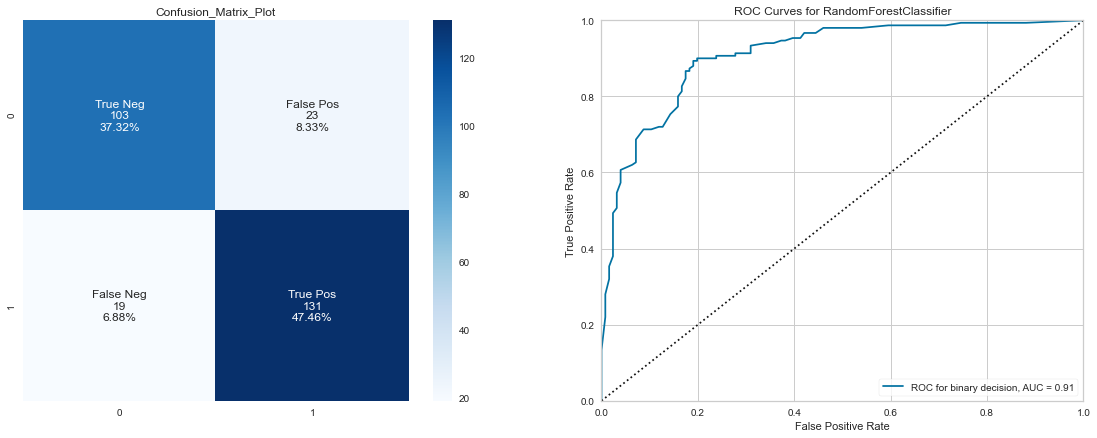

,Measure,Value
0,Accuracy,84.782609
1,Precision,85.064935
2,Recall,87.333333
3,Specificity,87.333333
4,F1-score,86.184211
5,Cross Validation,85.984738
6,ROC_AUC Score,84.539683


In [44]:
rf = RandomForestClassifier(max_features=2, n_estimators=80)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
model(rf,rf_pred)

### Random Forest With Hyperparameter Tunning

**Grid search** was also used for the random forest classifier. 

In [45]:
# Creating the hyperparameter grid
param_dist = {"max_features": np.arange(1,6,1),
              "n_estimators": np.arange(10,210,10)}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_dist, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train, y_train)

rf_ht_score = grid_result.best_score_
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.873874 using {'max_features': 1, 'n_estimators': 110}


- **max_features**: This represents the number of input features used to build our model.

- **n_estimators**: This represents the number of trees used to create the random forest algorithm.

## Adaptive Boosting

#### Adaptive boosting is one of the ensembles boosting classifiers

we will use the decision tree classifier that we define before (**dt**) as base model

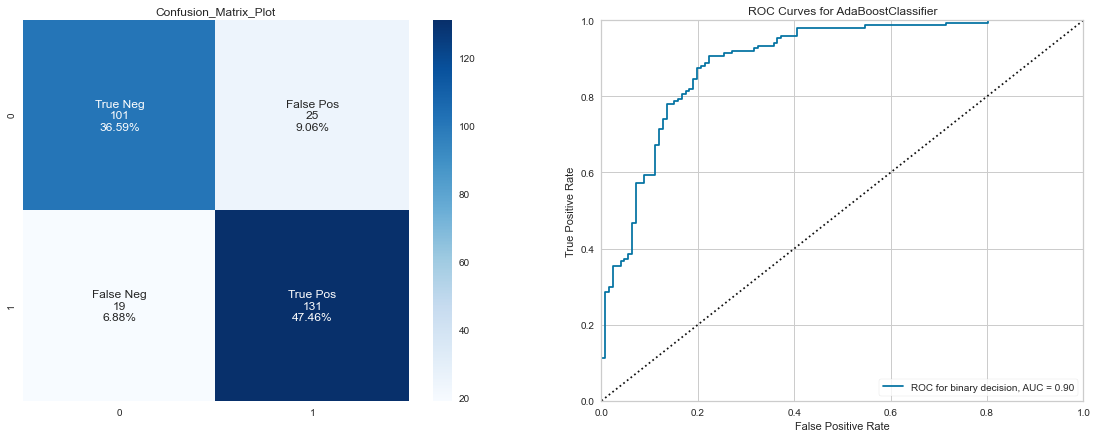

,Measure,Value
0,Accuracy,84.057971
1,Precision,83.974359
2,Recall,87.333333
3,Specificity,87.333333
4,F1-score,85.620915
5,Cross Validation,82.815730
6,ROC_AUC Score,83.746032


In [46]:
ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, base_estimator=dt)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
model(ab, ab_pred)

## ANN

In [47]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras.models import Sequential 
from keras.layers import Dense, SimpleRNN

- **The neural network** was defined with 3 hidden layers with a ReLU activation function and 1 output layer with a sigmoid activation function. 
- To prevent overfitting, 2 dropout layers were also used. 

In [48]:
annmodel = Sequential([Dense(10,input_shape=(11,),activation='relu'), #first layer
                    Dense(8,activation='relu'), #second layer
                    keras.layers.Dropout(0.3),
                    Dense(6,activation='relu'), #third layer
                    keras.layers.Dropout(0.3),
                    Dense(units=1,activation='sigmoid')]) # output layer

In [49]:
print(annmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable pa

In [50]:
annmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = annmodel.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          batch_size=1, 
          epochs=20, 
          verbose='auto')

Epoch 1/20
642/642 [==============================] - 1s 1ms/step - loss: 0.7142 - accuracy: 0.5826 - val_loss: 0.6079 - val_accuracy: 0.7464
Epoch 2/20
642/642 [==============================] - 1s 1ms/step - loss: 0.5857 - accuracy: 0.7445 - val_loss: 0.5539 - val_accuracy: 0.7899
Epoch 3/20
642/642 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.8037 - val_loss: 0.5142 - val_accuracy: 0.7971
Epoch 4/20
642/642 [==============================] - 1s 1ms/step - loss: 0.5169 - accuracy: 0.8037 - val_loss: 0.4952 - val_accuracy: 0.8152
Epoch 5/20
642/642 [==============================] - 1s 1ms/step - loss: 0.4705 - accuracy: 0.8255 - val_loss: 0.4819 - val_accuracy: 0.8007
Epoch 6/20
642/642 [==============================] - 1s 1ms/step - loss: 0.4900 - accuracy: 0.8069 - val_loss: 0.4759 - val_accuracy: 0.8116
Epoch 7/20
642/642 [==============================] - 1s 1ms/step - loss: 0.4905 - accuracy: 0.8084 - val_loss: 0.4625 - val_accuracy: 0.8116
Epoch 

In [52]:
score = annmodel.evaluate(x = X_test, y = y_test, verbose=1)

9/9 [==============================] - 0s 976us/step - loss: 0.4117 - accuracy: 0.8333


In [53]:
pred_train = annmodel.predict(X_train)
pred_test = annmodel.predict(X_test)
pred_train = (pred_train > 0.5)
pred_test = (pred_test > 0.5)

print('\nMax val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')

print('\nEvaluation on Training Data')
print("Accuracy (on train data): ", accuracy_score(y_train, pred_train)*100)
print("Recall (on train data): ", recall_score(y_train, pred_train)*100)


print('\nEvaluation on Test Data')
print("Accuracy (on test data):  ", accuracy_score(y_test, pred_test)*100)
print("Recall (on test data):  ", recall_score(y_test, pred_test)*100)

9/9 [==============================] - 0s 623us/step

Max val_acc achieved: 83.70 %
Max acc achieved: 86.29 %

Evaluation on Training Data
Accuracy (on train data):  89.8753894080997
Recall (on train data):  89.94413407821229

Evaluation on Test Data
Accuracy (on test data):   83.33333333333334
Recall (on test data):   86.0


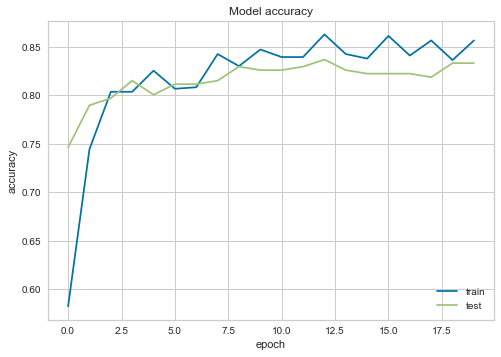

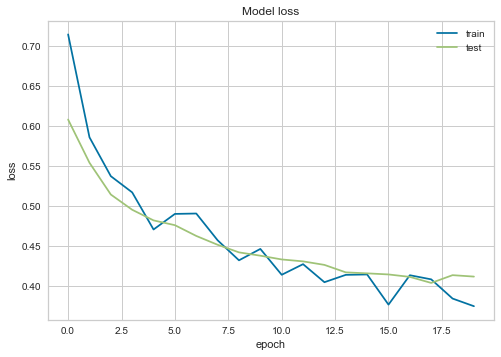

In [54]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

- The loss decreases at each epoch in the training and increased at the testing
- The final accuracy achieved on the training data is 90% and on the testing data is 84%. 

In [55]:
ann_cm = confusion_matrix(y_test, pred_test)
ann_acc = round(accuracy_score(pred_test,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[101  25]
 [ 21 129]]
83.33 %


In [57]:
# Create table for evaluation measures
acc = accuracy_score(y_test,pred_test)
pre = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
specificity = ann_cm[1,1]/(ann_cm[1,0]+ann_cm[1,1])
f1 = f1_score(y_test, pred_test)
rocval = roc_auc_score(y_test,pred_test) 

evaluation = pd.DataFrame({'Measure': ['Accuracy', 'Precision', 'Recall','Specificity', 'F1-score', 'ROC_AUC Score'], 
                           'Value': [acc*100, pre*100, recall*100, specificity*100, f1*100, rocval*100 ]})
evaluation

,Measure,Value
0,Accuracy,83.333333
1,Precision,83.766234
2,Recall,86.000000
3,Specificity,86.000000
4,F1-score,84.868421
5,ROC_AUC Score,83.079365


---

# **Models Comparsion**

In [58]:
accuracies =[accuracy_score(y_test,knn_pred), accuracy_score(y_test,nb_pred),accuracy_score(y_test,lr_pred),
             accuracy_score(y_test,dt_pred),accuracy_score(y_test,svc_pred),accuracy_score(y_test,rf_pred),
             accuracy_score(y_test,ab_pred),score[1]]
models = ['KNN', 'Naïve Bayes','Logistic Regression','Decision Tree','SVM','Random Forest','Adaptive Boosting', 'ANN']

a = {'Model Name':models,'Accuracy':accuracies}
result = pd.DataFrame(a)
result = result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)
result

,Model Name,Accuracy
0,SVM,0.851449
1,Random Forest,0.847826
2,Adaptive Boosting,0.840580
3,KNN,0.836957
4,ANN,0.833333
5,Logistic Regression,0.829710
6,Naïve Bayes,0.826087
7,Decision Tree,0.822464


- We can see that the **SVM** classifier has the highest classification accuracies of 85% among the others. 
- In the case of the tuned classification model, the **random forest** has 87% accuracy and the **decision tree** has 86% accuracy.


####  We can conclude that the best classifier on the dataset is the random forest with grid search hyperparameter tunning.

---

# **Model interpretation with feature importance**

#### Feature Importance can help you communicate and interpret your model with other stakeholders. 

In [354]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [380]:
col_list = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#### The random forests algorithm can be used not just for modeling, but also for selecting important features. 

It works by assigning a score for each input feature, representing its "importance" for the given model. If a specific feature has a higher score, then it will have more of an effect on the model being used to predict a target variable.

In [384]:
# Define the random forest 
rf = RandomForestClassifier(max_features=2, n_estimators=80)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate the model
rf.score(X_train, y_train)
acc_random_forest = round(rf.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

84.42 %


In [400]:
# define a dataframe for features and their score
importances = pd.DataFrame({'Feature':col_list,'Importance':np.round(rf.feature_importances_,3)})

# sort the values
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances

,Importance
Feature,
ST_Slope,0.225
ChestPainType,0.115
MaxHR,0.108
Cholesterol,0.102
Age,0.091
ExerciseAngina,0.088
Oldpeak,0.084
RestingBP,0.069
Sex,0.044


<AxesSubplot:ylabel='feature'>

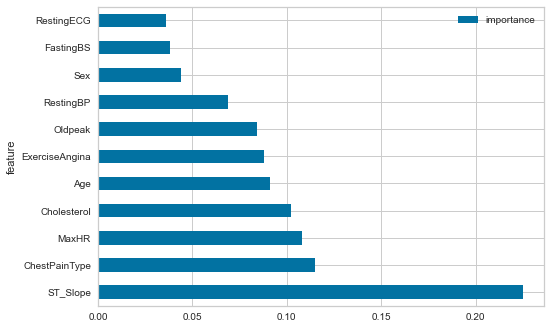

In [394]:
importances.plot.barh()

- **ST_Slope** has the highest score which indicates that has significant for predicting the HeartDisease target. 
- **RestingECG** and **FastingBS** don't play a significant role in our random forest classifiers prediction process and can be discarded.